Mercier Anna-Eve projet 1 


3.1 Reproduire les étapes 2-4 de la méthodologie en conduite de projet ML

In [331]:
# Imports
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy import sparse

In [291]:
customer = pd.read_csv("dataset/dataset/Customer.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [292]:
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


Pandas considers first_item_prize and revenue as objects, so we must convert them to numbers before we can proceed to more analysis.

In [293]:
for col in ["first_item_prize", "revenue"]:
    customer[col] = pd.to_numeric(customer[col], errors="coerce")

print(customer.dtypes)

age                 float64
pages               float64
first_item_prize    float64
gender               object
ReBuy                  bool
News_click          float64
country              object
revenue             float64
dtype: object


We will perform a data analysis using Describe, histograms, and box plots to see if any outliers are already observable and to check the condition of our dataset. 

In [294]:
customer.describe()

,age,pages,first_item_prize,News_click,revenue
count,10000.000000,10000.000000,9997.000000,10000.000000,9996.000000
mean,37.431400,5.995000,40.431730,4.412000,122.812625
std,9.490474,2.438559,27.556289,2.418231,86.750910
min,18.000000,1.000000,10.000000,0.000000,1.000000
25%,31.000000,5.000000,22.000000,3.000000,59.000000
50%,37.000000,6.000000,42.000000,4.000000,100.000000
75%,43.000000,7.000000,44.000000,6.000000,164.000000
max,79.000000,14.000000,117.000000,10.000000,995.000000


Thanks to discribe, we can see that the dataset must have NAs in fisrt_item_prise and revenue. We can already see some values that seem to be outliers. 

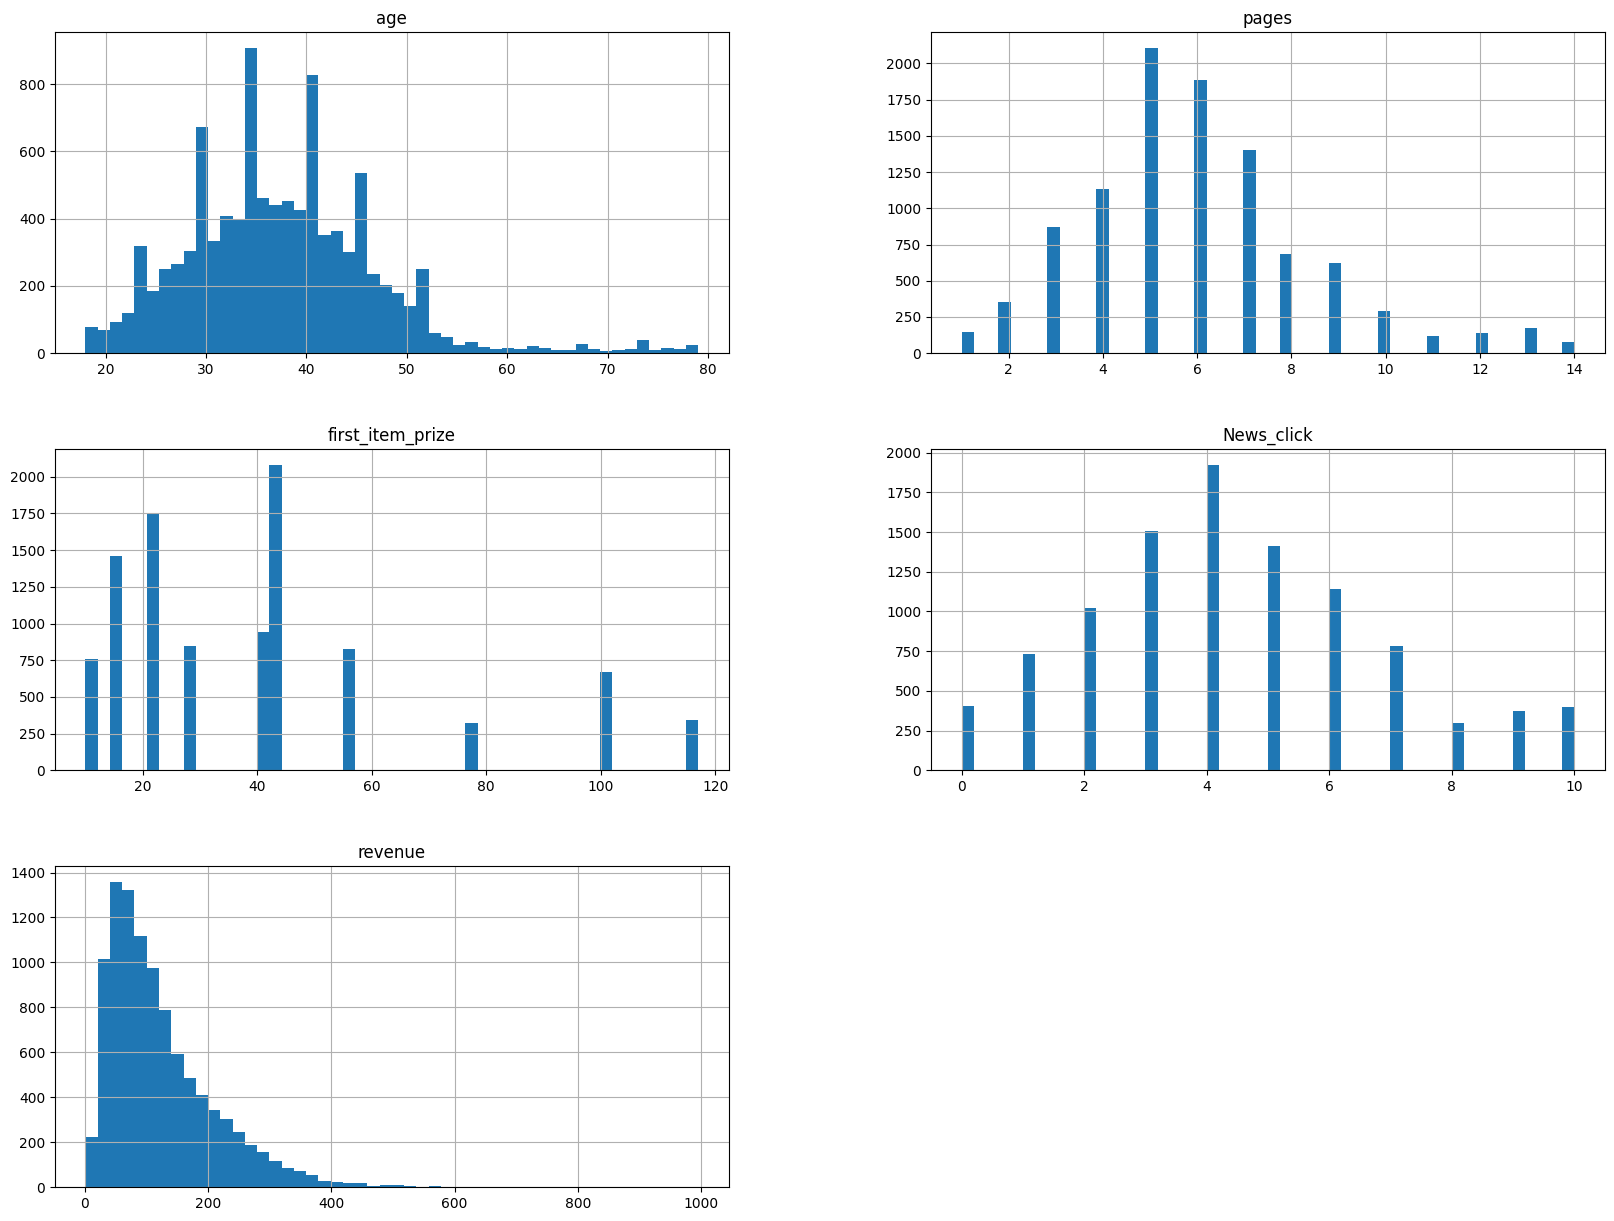

In [295]:
%matplotlib inline
customer.hist(bins=50, figsize=(20,15))
plt.show()

We can see that the majority of quantitative variables have a normal distribution. We also note, as before, the outliers, but more clearly. 

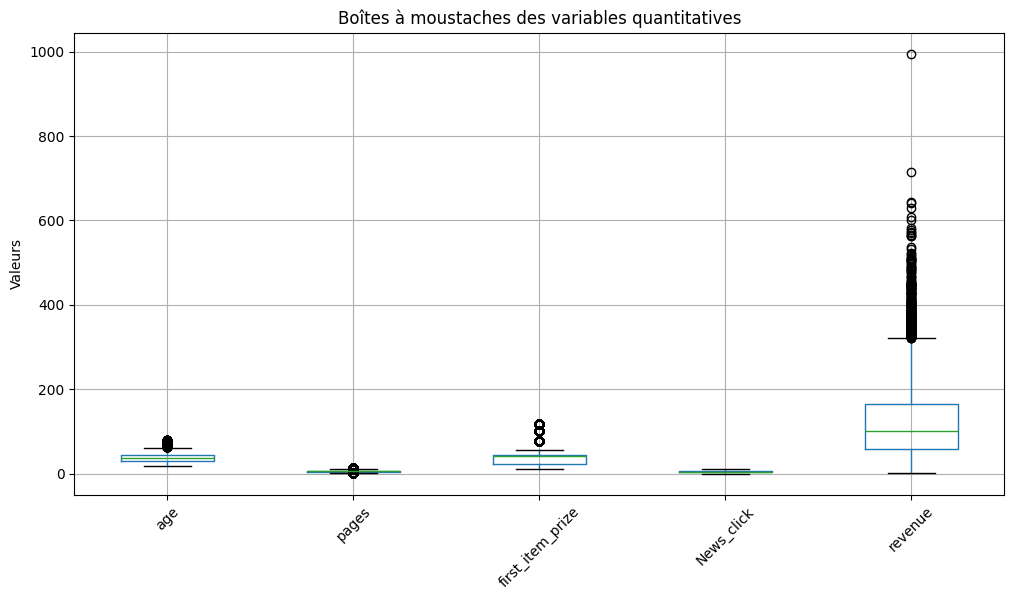

In [296]:
cols_quanti = ["age", "pages", "first_item_prize", "News_click", "revenue"]

plt.figure(figsize=(12, 6))

customer[cols_quanti].boxplot()
plt.title("Boîtes à moustaches des variables quantitatives")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()

We can see that revenue has the most outliers values.

In [297]:
train_set, test_set = train_test_split(customer, test_size=0.2)

We display the train_set header to ensure that the data is properly separated. 

In [298]:
train_set.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
1547,34.0,6.0,44.0,Fem,False,8.0,Bangladesh,97.0
6936,46.0,10.0,44.0,Masc,True,9.0,Uganda,202.0
9565,42.0,6.0,15.5,Fem,False,5.0,Mozambique,36.0
451,35.0,7.0,44.0,Fem,False,4.0,United States,239.0
6395,43.0,7.0,42.0,Fem,True,9.0,Algeria,126.0


Creation of a copy variable so as not to corrupt the original test values

In [299]:
customer_train_set = train_set.copy()

We will now look at the correlation between variables in order to determine the limits of our dataset. 

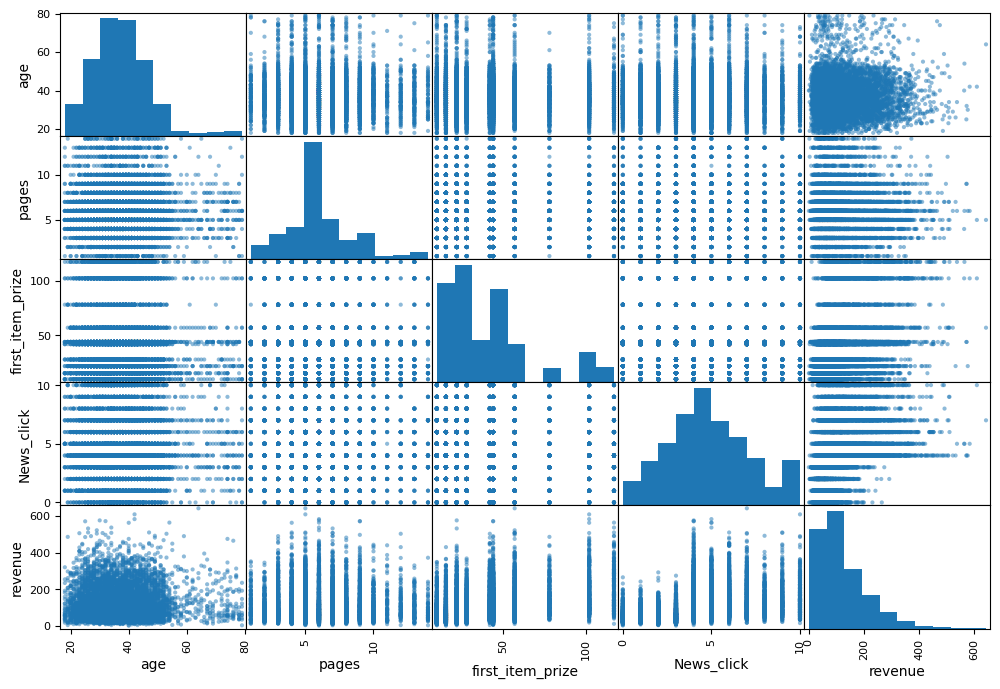

In [300]:
scatter_matrix(customer_train_set[cols_quanti], figsize=(12,8))
plt.show()

We observe that income and age seem to correlate slightly. 
The other variables are independent of each other. 

3.2 Nettoyage des données du dataset de base Customer.csv

3.2.1 Ramplacement des données manquantes

(Here we redefine customer so that we can start from scratch in order to correctly analyze outliers rather than having to do so by forcibly modifying the variable types.)

In [301]:
customer = pd.read_csv("dataset/dataset/Customer.csv")

In [302]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [303]:
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


Here we can see that values that are normally only numerical, such as value or first_items price, are considered objects, so we can assume the presence of NA.

The discribe function also shows us the presence of values that appear to be outliers.

In [304]:
customer.isna().sum()

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

We can see here that no values considered as Na by Panda are present.
However, this does not exclude the presence of special characters such as -, ?, “”, etc. And knowing that during the previous data studies, some data seemed to be missing, we can therefore conclude that erroneous values not recognized as Na were included in the dataset.

We will therefore manually check with .unique for any incorrect values that have been entered into the dataset.

In [305]:
for col in customer.columns:
    print(f"\nColonne : {col}")
    print(customer[col].unique())


Colonne : age
[41. 34. 38. 20. 39. 36. 68. 42. 40. 35. 28. 25. 73. 33. 37. 32. 49. 44.
 29. 53. 21. 45. 24. 51. 57. 72. 31. 47. 30. 23. 43. 26. 54. 50. 27. 48.
 58. 67. 22. 66. 19. 64. 46. 78. 52. 60. 69. 77. 55. 74. 18. 56. 70. 59.
 65. 76. 71. 61. 63. 79. 62. 75.]

Colonne : pages
[ 6.  4.  5.  1. 10.  8.  7. 12.  9.  3.  2. 13. 14. 11.]

Colonne : first_item_prize
['28.0' '15.5' '?' '44.0' '10.0' '57.0' '42.0' '78.0' '102.0' '117.0'
 '22.0']

Colonne : gender
['Fem' 'Masc']

Colonne : ReBuy
[False  True]

Colonne : News_click
[ 4.  2.  7.  5.  3.  0.  1.  6.  9. 10.  8.]

Colonne : country
['China' 'India' 'United States' 'Indonesia' 'Brazil' 'Pakistan' 'Nigeria'
 'Bangladesh' 'Russia' 'Japan' 'Mexico' 'Philippines' 'Vietnam' 'Ethiopia'
 'Egypt' 'Germany' 'Iran' 'Turkey' 'Thailand' 'France' 'United Kingdom'
 'Italy' 'Burma' 'South Africa' 'South Korea' 'Colombia' 'Spain' 'Ukraine'
 'Tanzania' 'Kenya' 'Argentina' 'Algeria' 'Poland' 'Sudan' 'Uganda'
 'Canada' 'Iraq' 'Morocco' 'Peru' 

We can observe the presence of question marks and unknowns. We have found our NA values

In [306]:
class ReplaceUnknowns(BaseEstimator, TransformerMixin):
    def __init__(self, replacements=None):
        self.replacements = replacements if replacements is not None else ['unknown', '?', 'None', 'N/A']
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = X.copy()
        Xt = Xt.replace(self.replacements, np.nan)
        # conversion des colonnes numériques en float si possible
        for col in Xt.columns:
            Xt[col] = pd.to_numeric(Xt[col], errors='ignore')
        return Xt

# test
df_test = pd.DataFrame({'A': ['unknown', 'x', '?'], 'B':[1,2,3]})
print('Avant:\n', df_test)
print('Après:\n', ReplaceUnknowns().transform(df_test))

Avant:
          A  B
0  unknown  1
1        x  2
2        ?  3
Après:
      A  B
0  NaN  1
1    x  2
2  NaN  3


C:\Users\Annam\AppData\Local\Temp\ipykernel_26824\2934565120.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  Xt[col] = pd.to_numeric(Xt[col], errors='ignore')


In [307]:
customer.isna().sum()

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

After taking special characters into account, several Na values are detected.
These values are found in the first_item_prize column corresponding to the price of the first item purchased by the customer and in the revenue column corresponding to the total price of purchases made by the customer.

We will first check that when revenue is missing, first_item_prize exists, and vice versa.

To replace those in first_item_prize, we will use first_item_prize, ReBuy, and revenue.
The ReBuy column indicates whether the customer has already placed a new order on the site.
The revenue column corresponds to the revenue generated by the site thanks to the customer's order.
Thus, to replace the Na values, we can:
- Replace the Na values with the revenue directly when the customer has not placed another order on the site by revenue.
- Replace the Na values with the first_item_prize average of people who have already placed another order when the customer has already placed another order.

To replace the revenue values, we will use first_item_prize, ReBuy, and revenue.
So, to replace the Na values, we can:
- Replace the Na values with the revenue directly when the customer has not placed another order on the site with the first_item_prize.
- Replace the Na values with the average revenue of people who have already placed another order when the customer has already placed another order.

In [308]:
class PairwiseImputer(BaseEstimator, TransformerMixin):
    def __init__(self, col_a='first_item_prize', col_b='revenue'):
        self.col_a = col_a
        self.col_b = col_b
    def fit(self, X, y=None):
        self.mean_a_ = X[self.col_a].mean()
        self.mean_b_ = X[self.col_b].mean()
        return self
    def transform(self, X):
        Xt = X.copy()
        if self.col_a in Xt.columns and self.col_b in Xt.columns:
            Xt[self.col_a] = Xt[self.col_a].fillna(Xt[self.col_b])
            Xt[self.col_b] = Xt[self.col_b].fillna(Xt[self.col_a])

            Xt[self.col_a] = Xt[self.col_a].fillna(self.mean_a_)
            Xt[self.col_b] = Xt[self.col_b].fillna(self.mean_b_)
        return Xt

# test
df_test = pd.DataFrame({'first_item_prize':[np.nan, 10, np.nan], 'revenue':[5, np.nan, np.nan]})
print('Avant:\n', df_test)
print('Après:\n', PairwiseImputer().fit_transform(df_test))

Avant:
    first_item_prize  revenue
0               NaN      5.0
1              10.0      NaN
2               NaN      NaN
Après:
    first_item_prize  revenue
0               5.0      5.0
1              10.0     10.0
2              10.0      5.0


3.2.2 Remplacement des données aberrantes (extrêmes, outliers)

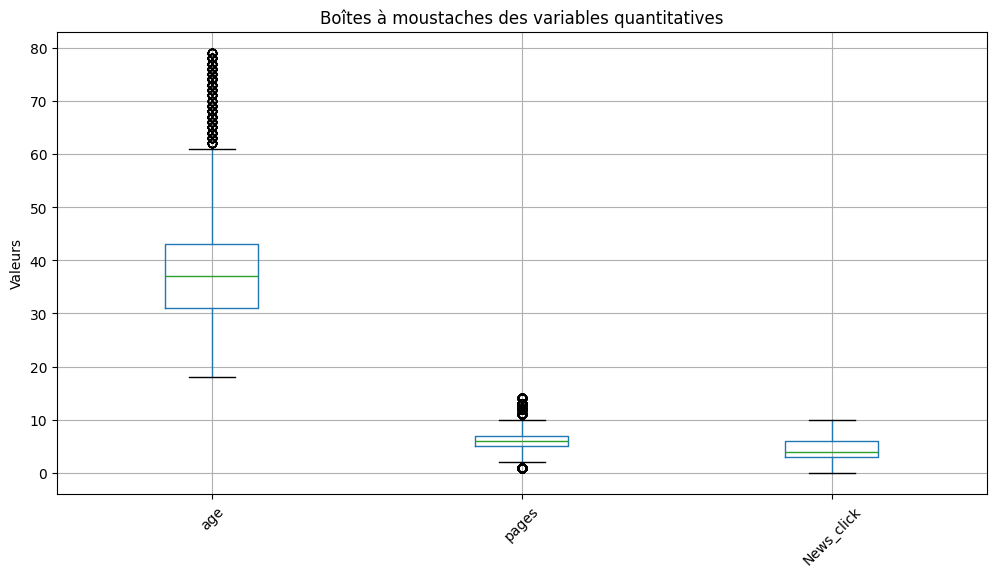

In [309]:
plt.figure(figsize=(12, 6))

customer[cols_quanti].boxplot()
plt.title("Boîtes à moustaches des variables quantitatives")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()

Thanks to the box plot method, we observe several outliers that will therefore need to be modified by the mean. 

We will create two functions, one to identify abnormal values and one to replace these values with the average.

In [310]:
def outliers_values(x: pd.Series) -> pd.Series:
    if x.dropna().empty:
        return pd.Series([False]*len(x), index=x.index)
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (x < lower_bound) | (x > upper_bound)

# test
s = pd.Series([1,2,2,3,100])
print('Masque outliers test:', outliers_values(s).tolist())

Masque outliers test: [False, False, False, False, True]


In [311]:
class OutlierToMean(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_cols=None):
        self.numeric_cols = numeric_cols
    def fit(self, X, y=None):
        if self.numeric_cols is None:
            self.numeric_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()
        else:
            self.numeric_cols_ = [c for c in self.numeric_cols if c in X.columns]
        
        self.means_ = {col: X[col].mean() for col in self.numeric_cols_}
        return self
    def transform(self, X):
        Xt = X.copy()
        for col in self.numeric_cols_:
            mask = outliers_values(Xt[col])
            Xt.loc[mask, col] = self.means_[col] 
        return Xt

# test
df_test = pd.DataFrame({'age':[20, 30, 200, 25], 'pages':[1,2,3,4]})
print('Avant:\n', df_test)
print('Après:\n', OutlierToMean().fit_transform(df_test))

Avant:
    age  pages
0   20      1
1   30      2
2  200      3
3   25      4
Après:
      age  pages
0  20.00    1.0
1  30.00    2.0
2  68.75    3.0
3  25.00    4.0


C:\Users\Annam\AppData\Local\Temp\ipykernel_26824\4169721510.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Xt.loc[mask, col] = self.means_[col]
C:\Users\Annam\AppData\Local\Temp\ipykernel_26824\4169721510.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Xt.loc[mask, col] = self.means_[col]


3.3 Enrichissement des données

We will now join the Customer.csv dataset with CountryPopulation.csv using the country column.

We will also merge customer.csv and country.csv if the GDP condition is True for the country column.

In [312]:
class DataEnricher(BaseEstimator, TransformerMixin):
    def __init__(self, pop_path, gdp_path=None, gdp_true=False,numeric_cols_for_clean=None):
        self.pop_path = pop_path
        self.gdp_path = gdp_path
        self.gdp_true = gdp_true
        self.numeric_cols_for_clean = numeric_cols_for_clean if numeric_cols_for_clean else []


    def fit(self, X, y=None):
        self.df_pop = pd.read_csv(self.pop_path)
        self.df_pop.columns = [c.lower() for c in self.df_pop.columns]


        if self.gdp_true and self.gdp_path and os.path.exists(self.gdp_path):
            self.df_gdp = pd.read_csv(self.gdp_path)
            self.df_gdp.columns = [c.lower() for c in self.df_gdp.columns]
        else:
            self.df_gdp = None

        if self.df_gdp is not None:
            self.df_gdp.columns = [c.lower() for c in self.df_gdp.columns]
        return self

    def transform(self, X):
        X = X.copy()
        X = X.merge(self.df_pop, on='country', how='left')
   
        if self.gdp_true and self.df_gdp is not None:
            X = X.merge(self.df_gdp, on='country', how='left')
        return X


print('DataEnricher class defined.')

DataEnricher class defined.


Data standardization and encoding

In [317]:
cols_categ = ['gender', 'ReBuy', 'country']
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, cols_quanti + ['gdp_inhab', 'population']),
    ('cat', cat_pipeline, cols_categ)
])

Creating paths to each file so that we can later act as if it exists

In [318]:
customer_path = 'dataset/dataset/Customer.csv'
population_path = 'dataset/dataset/CountryPopulation.csv'
gdp_path = 'dataset/dataset/CountryGDP.csv'

Our pipeline

In [320]:
pipeline = Pipeline(steps=[
    ('replace_unknowns', ReplaceUnknowns()),
    ('pairwise_impute', PairwiseImputer(col_a='first_item_prize', col_b='revenue')),
    ('outliers_to_nan', OutlierToMean(numeric_cols=cols_quanti)),
    ('enrich', DataEnricher(
        pop_path=population_path,
        gdp_path=gdp_path if os.path.exists(gdp_path) else None, 
        gdp_true=True,
        numeric_cols_for_clean=cols_quanti
    )),
    ('preprocess', preprocessor)
])

print('Pipeline construit :', pipeline)

Pipeline construit : Pipeline(steps=[('replace_unknowns',
                 ReplaceUnknowns(replacements=['unknown', '?', 'None', 'N/A'])),
                ('pairwise_impute', PairwiseImputer()),
                ('outliers_to_nan',
                 OutlierToMean(numeric_cols=['age', 'pages', 'first_item_prize',
                                             'News_click', 'revenue'])),
                ('enrich',
                 DataEnricher(gdp_path='dataset/dataset/CountryGDP.csv',
                              gdp_true=True,
                              numeric_cols_for_clean=['age', '...
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
  

Launching our pipeline and displaying the results table

In [332]:

if os.path.exists(customer_path):
    df_customer = pd.read_csv(customer_path)
    print('Customer chargé — shape:', df_customer.shape)

    X_transformed = pipeline.fit_transform(df_customer)

    if not isinstance(X_transformed, pd.DataFrame):
        df_clean = pd.DataFrame(X_transformed, index=df_customer.index)
        
    else:
        df_clean = X_transformed

    if sparse.issparse(X_transformed):
        X_transformed = X_transformed.toarray()

    feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
    feature_names = [name.replace("num__", "").replace("cat__", "") for name in feature_names]

    df_final = pd.DataFrame(X_transformed, columns=feature_names, index=df_customer.index)
    display(df_final.head(10))
        
    
else:
    print('Customer.csv non trouvé au chemin', customer_path)

Customer chargé — shape: (10000, 8)


C:\Users\Annam\AppData\Local\Temp\ipykernel_26824\2934565120.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  Xt[col] = pd.to_numeric(Xt[col], errors='ignore')


,age,pages,first_item_prize,News_click,revenue,gdp_inhab,population,gender_Fem,gender_Masc,ReBuy_False,...,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen
0,0.533131,0.139950,-0.319928,-0.170381,-0.011709,-0.378042,4.980982,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.336285,-0.947780,-1.213921,-0.997473,-1.114894,-0.378042,4.980982,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.160524,-0.403915,0.570511,1.070257,-0.040363,-0.378042,4.980982,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.075118,0.137231,0.824384,-0.997473,-0.613446,-0.378042,4.980982,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.284726,2.315411,-1.607278,-0.170381,-0.484503,-0.378042,4.980982,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.284726,1.227680,0.824384,0.243165,-1.000278,-0.378042,4.980982,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.087881,0.139950,0.824384,-0.997473,-0.899988,-0.378042,4.980982,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.089902,-0.947780,1.754137,1.070257,0.203197,-0.378042,4.980982,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.657333,0.683815,0.681345,0.243165,0.002618,-0.378042,4.980982,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.408928,0.137231,0.681345,0.243165,-0.069017,-0.378042,4.980982,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
